# Termination Analysis On Terminated Clinical Trails

In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
from time import time
from matplotlib import pyplot as plt
%matplotlib inline
from nltk.tokenize import word_tokenize,RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from nltk import FreqDist
from nltk.util import ngrams
from nltk.tag import pos_tag
import seaborn as sns

In [6]:
dataset = pd.read_csv("terminated_trials.csv")

In [4]:
dataset.head(3)

,Rank,NCT Number,Title,Acronym,Recruitment,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Completion Date,Last Verified,First Submitted,First Posted,Results First Submitted,Results First Posted,Last Update Submitted,Last Update Posted,Locations,URL
0,1,NCT03427073,Dose-escalation Study of ALM201 in Patients Wi...,NaN,Terminated,No Results Available,Solid Tumors|Ovarian Cancer,Drug: ALM201,Characterization of the safety and tolerabilit...,Almac Discovery,...,"March 13, 2017",February 2018,"March 5, 2015","February 9, 2018",NaN,NaN,"February 2, 2018","February 9, 2018","Centre for Cancer Research and Cell Biology, Q...",https://ClinicalTrials.gov/show/NCT03427073
1,2,NCT03411460,Satisfaction of Hospitalized Diabetic Patients...,GLUCO FLASH,Terminated,No Results Available,Insulin-Dependent Diabetes,Device: FreeStyle Libre™ system|Procedure: Fin...,Satisfaction of patient-determined hospital ca...,Centre Hospitalier Universitaire de Nīmes,...,"August 23, 2017",January 2017,"June 16, 2017","January 26, 2018",NaN,NaN,"January 25, 2018","January 26, 2018","CHU Nimes, Nîmes, France",https://ClinicalTrials.gov/show/NCT03411460
2,3,NCT03411447,Impact of Early Enteral vs. Parenteral Nutriti...,NaN,Terminated,No Results Available,Acute Respiratory Failure|Shock,Other: Parenteral nutrition|Other: Enteral nut...,proportion of patients with abundant microaspi...,Centre Hospitalier Departemental Vendee|Minist...,...,"July 7, 2015",January 2018,"July 18, 2017","January 26, 2018",NaN,NaN,"January 25, 2018","January 26, 2018","CHU Amiens, Amiens, France|Centre hospitalier ...",https://ClinicalTrials.gov/show/NCT03411447


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14992 entries, 0 to 14991
Data columns (total 30 columns):
Rank                       14992 non-null int64
NCT Number                 14992 non-null object
Title                      14992 non-null object
Acronym                    3253 non-null object
Recruitment                14992 non-null object
Study Results              14992 non-null object
Conditions                 14992 non-null object
Interventions              13968 non-null object
Outcome Measures           14140 non-null object
Sponsor/Collaborators      14992 non-null object
Gender                     14978 non-null object
Age                        14992 non-null object
Phases                     10346 non-null object
Enrollment                 14763 non-null float64
Funded Bys                 14992 non-null object
Study Type                 14992 non-null object
Study Designs              14923 non-null object
Other IDs                  14991 non-null object
Start Date

###### Web Scrapping for "Why Stopped?"

The data used didn't have the column "Why Stopped" which was necessary for analysis. So, the column "Why Stopped" has been taken from the site "clinicaltrials.org" with the help of Web Scrapping with Beautiful Soap.

In [ ]:
#Here's the code for web scrapping 
termination_reason = []
for i in dataset['URL']:
    page = requests.get(i)
    soup = BeautifulSoup(page.text, 'html.parser')
    why_stop = soup.find_all(class_='not-recruiting-status')
    temp=str(why_stop[0])
    if temp.find("(")==-1:
        reason = np.nan     
    else:
        reason = temp.split("(")[1].split(")")[0]
    termination_reason.append(reason)
    

In [102]:
termination_reason = pd.Series(termination_reason)

In [104]:
dataset["Why Stopped"] = termination_reason

In [109]:
dataset.to_csv("terminated_trials_complete.csv")

In [2]:
data=pd.read_csv('terminated_trials_complete.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14992 entries, 0 to 14991
Data columns (total 32 columns):
Unnamed: 0                 14992 non-null int64
Rank                       14992 non-null int64
NCT Number                 14992 non-null object
Title                      14992 non-null object
Acronym                    3253 non-null object
Recruitment                14992 non-null object
Study Results              14992 non-null object
Conditions                 14992 non-null object
Interventions              13968 non-null object
Outcome Measures           14140 non-null object
Sponsor/Collaborators      14992 non-null object
Gender                     14978 non-null object
Age                        14992 non-null object
Phases                     10346 non-null object
Enrollment                 14763 non-null float64
Funded Bys                 14992 non-null object
Study Type                 14992 non-null object
Study Designs              14923 non-null object
Other IDs  

###### Tokenization And Vocabulary Formation

In [4]:
all_words=[]
stop_words=stopwords.words('english')
for sent in data['Why Stopped'].str.lower():
    if type(sent)!=float:
        for word in word_tokenize(sent):
            if word not in stop_words:
                all_words.append(word)

In [5]:
dist=FreqDist(all_words)

Frequency distribution of all words in the vocabulary

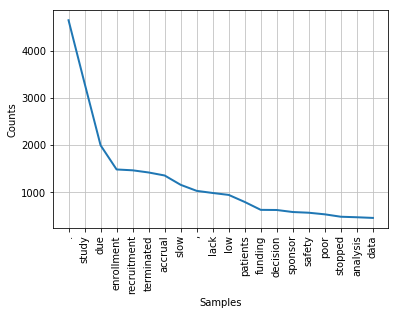

In [6]:
dist.plot(20)

In [7]:
lis=[]
for sent in  data['Why Stopped'].str.lower():
    if type(sent)!=float:
        lis.append(sent)

It's important to include the combination of two words because sometimes they also conveys some meaning. Hence, forming bigrams.

In [8]:
n_grams=[]
words=[]
for sent in lis:
    for word in sent.lower().split():
        if word not in stop_words:
            words.append(word)
for tup in ngrams(words,2):
        n_grams.append(tup)

Here's the frequency of all the bigrams we have formed.

In [9]:
n_grams_dist=FreqDist(n_grams)

In [10]:
word_pos=[]
for sent in lis:
    pl=pos_tag(sent.split())
    for index in range(len(pl)):
        if pl[index][1]=='JJ':
            if index<len(pl)-1:
                word_pos.append(pl[index][0]+' '+pl[index+1][0])

The above code is all about finding out two words combinations from all the sentecnces with the first word necessarily being an adjective. These combinations will be further used to categorize the reasons of termination of clinical trials.

In [11]:
n_grams_dist_jj=FreqDist(word_pos)

In [12]:
n_grams_dist_jj.most_common(10)

[('due to', 1977),
 ('slow accrual', 335),
 ('unable to', 247),
 ('low accrual', 236),
 ('interim analysis', 214),
 ('low enrollment', 188),
 ('poor accrual', 154),
 ('slow enrollment', 145),
 ('detailed description.', 143),
 ('low recruitment', 141)]

In [13]:
word_pos_3=[]
for sent in lis:
    words_nostop=[]
    for word in sent.split():
        if word not in stop_words:
             words_nostop.append(word)
    pl=pos_tag(words_nostop)
    for index in range(len(pl)):
        if pl[index][1]=='JJ':
            if index<len(pl)-2:
                word_pos_3.append(pl[index][0]+' '+pl[index+1][0]+' '+pl[index+2][0])

The combinations we extracted earlier were inefficient because of the stopwords.Hence, we will now find out three words combinations from all the sentecnces with the first word necessarily being an adjective and also with stopwords excluded. These combinations will be now used to categorize the reasons of termination of clinical trials.

In [14]:
n_grams_dist_jj_3=FreqDist(word_pos_3)
n_grams_dist_jj_3.most_common(10)

[('due slow accrual', 59),
 ('due slow enrollment', 51),
 ('due low enrollment', 50),
 ('principal investigator left', 50),
 ('due poor accrual', 45),
 ('due slow recruitment', 43),
 ('due slow accrual.', 42),
 ('low recruitment rate', 40),
 ('due low enrollment.', 34),
 ('interim analysis showed', 34)]

In [15]:
for sent in lis:
    if sent.find('potential')!=-1 and sent.find('concern')!=-1:
        print(sent)

due to potential concerns about liver safety 
there were no safety or effectiveness concerns. there were concerns about completing enrollment due to a competitive device's potential approval.
due to potential concerns about liver safety 
due to potential concerns about liver safety 
due to potential concerns about liver safety 
due to potential concerns about liver safety 
due to potential concerns about liver safety 
due to concerns about potential liver safety 
due to potential concerns about liver safety 
study terminated due to potential safety concerns in combination with platinum-based therapies
futility &amp; potential safety concern 


In order to get better results for creation of generalised reasons, we are applying RegexpTokenizer and will then use the trigrams to form the categories.

In [16]:
r=RegexpTokenizer(r'[A-Za-z]+')

In [17]:
n_grams=[]
words=[]
for sent in lis:
    for word in r.tokenize(sent.lower()):
        if word not in stop_words:
            words.append(word)
for tup in ngrams(words,3):
        n_grams.append(tup)

In [18]:
fd=FreqDist(n_grams)
fd.most_common(10)

[(('study', 'terminated', 'due'), 290),
 (('see', 'termination', 'reason'), 152),
 (('termination', 'reason', 'detailed'), 151),
 (('reason', 'detailed', 'description'), 151),
 (('study', 'terminated', 'early'), 111),
 (('study', 'stopped', 'due'), 109),
 (('due', 'slow', 'accrual'), 103),
 (('due', 'low', 'enrollment'), 96),
 (('terminated', 'early', 'due'), 94),
 (('terminated', 'due', 'low'), 82)]

Now since we have various generalised reasons for termination trials, all we have to do is to define a dictionary with necessary keywords associated with each keyword(generalised reason) to search for the reasons of termination in the "Why Stopped" column.

In [19]:
reasons={
    'Insufficient Enrollment':['enrol','recruit','inclusion','candidate','subject','patient','participa'],
    'Slow Accural':['accural','accrual'],
    'Pricipal Investigator Left':['investigator'],
    'Interim Analysis':['interim'],
    'Insufficient Efficacy':['effic'],
    'Funding':['fund','financ'],
    'Safety Concerns':['safe'],
    'Company Decision(s)':['benefit','authorit'],
    'Due to Intervention':['intervent','injection'],
    'Sufficient Data collected':['suffic'],
    'Insufficient Data':['insuffic'],
    'No Longer relevant':['relevant'],
    'Administrative Reasons':['administ','committe','board'],
    'Adverse Events':['adverse','toxic','cardi'],
    'Business Decision':['business'],
    'Clinical Hold':['hold'],
    'Strategic Decision':['phase','probab'],
    'Key Staff Left':['staff'], 
    'Other':['descript','acquisition']
}

In [20]:
data_reasons=dict()

In [21]:
for reason in reasons.keys():
    data_reasons[reason]=np.zeros(len(data))

Now, we will create a matrix to indicate which trials were stopped due to which reasons.

In [22]:
for index in range(len(data)):
    sent=data.loc[index,'Why Stopped']
    if type(sent)!=float:
        for word in r.tokenize(sent.lower()):
            for reason in reasons.keys():
                for val in reasons[reason]:
                    if word.find(val)==0:
                        data_reasons[reason][index]=1

In [23]:
data_reasons=pd.DataFrame(data_reasons)

###### Distribution of count of termination reasons.

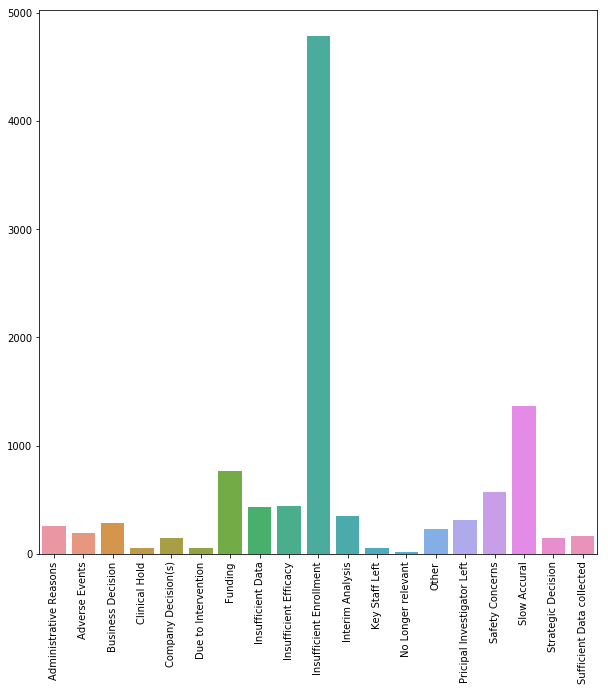

In [29]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.barplot(data_reasons.sum().index,data_reasons.sum().values)

The above reasons can be categorised into more flexible categories.

In [30]:
categories={
    'Neutral':['Insufficient Enrollment','Pricipal Investigator Left','Interim Analysis','Insufficient Data',
               'No Longer relevant','Clinical Hold','Strategic Decision','Key Staff Left','Other'],
    'Possibly Negative':['Slow Accural','Company Decision(s)','Due to Intervention','Administrative Reasons',
                        'Funding','Business Decision'],
    'Negative Efficacy':['Insufficient Efficacy'],
    'Negative Safety':['Adverse Events','Safety Concerns'],
    'Positive':['Sufficient Data collected']
}

In [31]:
data_categories=dict()
counts=data_reasons.sum()
for category in categories.keys():
    data_categories[category]=0
for category in categories.keys():
    c=0;
    for val in categories[category]:
        c+=counts[val]
    data_categories[category]=c

###### Distribution of count of reasons responsible for termination of Clinical Trials.

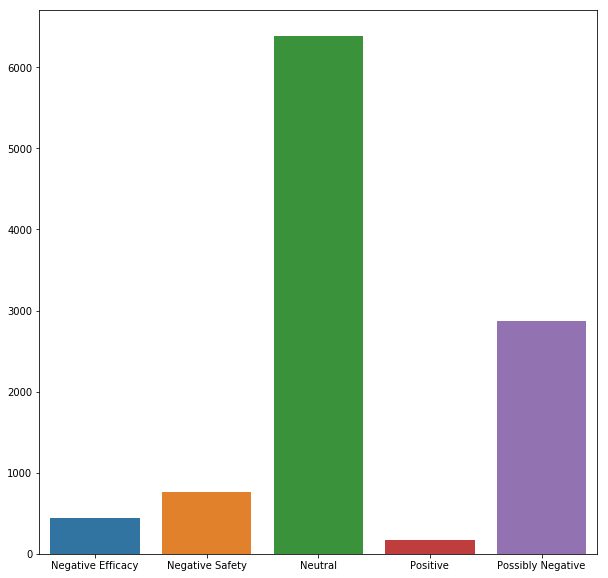

In [33]:
data_categories=pd.Series(data_categories)
plt.figure(figsize=(10,10))
sns.barplot(data_categories.index,data_categories.values)